CHAPTER 09 텍스트를 위한 인공신경망  
9-3 LSTM과 GRU 셀  

[LSTM(Long Short-Term Memory)]   
 
 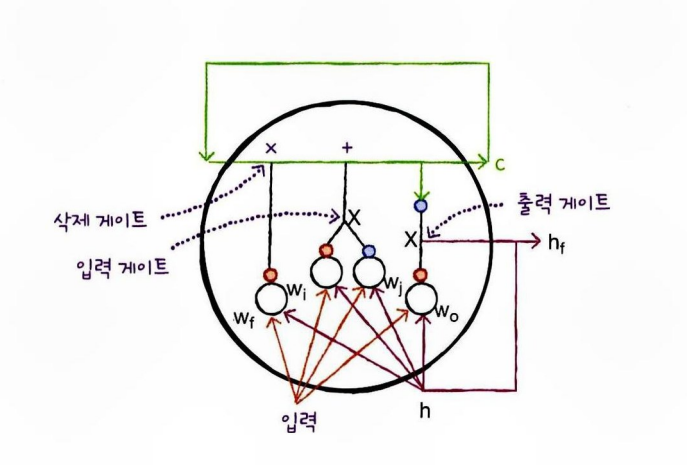

In [19]:
# IMDB 리뷰 데이터 불러오기
from keras.datasets import imdb

# 훈련/검증 세트 나누기
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [20]:
# 각 샘플의 길이 100으로 맞추기
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [21]:
# LSTM 셀을 사용한 순환층 만들기
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
# 모델 구조 출력
model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델 훈련
model_lstm.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64, 
                         validation_data=(val_seq, val_target),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6192 - loss: 0.6496 - val_accuracy: 0.7434 - val_loss: 0.5142
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7849 - loss: 0.4702 - val_accuracy: 0.7784 - val_loss: 0.4660
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8019 - loss: 0.4308 - val_accuracy: 0.8006 - val_loss: 0.4400
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8161 - loss: 0.4113 - val_accuracy: 0.7948 - val_loss: 0.4295
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8064 - loss: 0.4099 - val_accuracy: 0.8050 - val_loss: 0.4255
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.8184 - loss: 0.4021 - val_accuracy: 0.8028 - val_loss: 0.4257
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8117 - loss: 0.4053 - val_accuracy: 0.8066 - val_loss: 0.4360
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8196 - loss: 0.

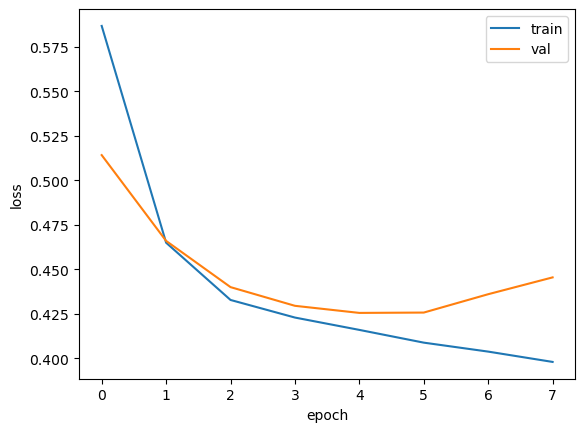

In [24]:
# 훈련 손실 및 검증 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
# 순환층에 드롭아웃 적용하기
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500,16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
# 모델 훈련
model_dropout.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64, 
                         validation_data=(val_seq, val_target),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6043 - loss: 0.6518 - val_accuracy: 0.7782 - val_loss: 0.4909
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7761 - loss: 0.4834 - val_accuracy: 0.7638 - val_loss: 0.4867
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7880 - loss: 0.4579 - val_accuracy: 0.7910 - val_loss: 0.4406
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8053 - loss: 0.4288 - val_accuracy: 0.7926 - val_loss: 0.4498
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8056 - loss: 0.4194 - val_accuracy: 0.7992 - val_loss: 0.4353
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8112 - loss: 0.4139 - val_accuracy: 0.7974 - val_loss: 0.4291
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8111 - loss: 0.4087 - val_accuracy: 0.7984 - val_loss: 0.4378
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8146 - loss: 0

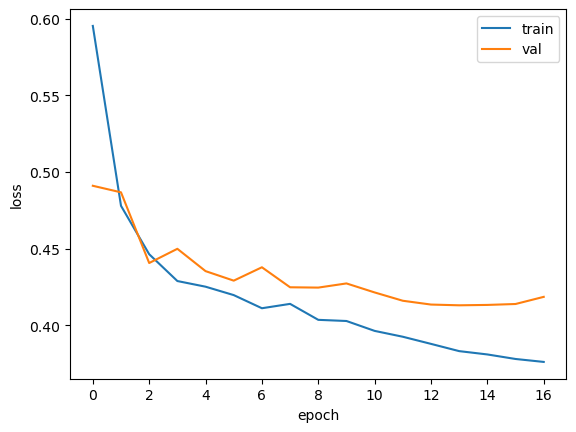

In [32]:
# 훈련 손실 및 검증 손실 그래프 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 2개층 연결하기
- 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달함  
- 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함(앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함)

[케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면]  
: 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정


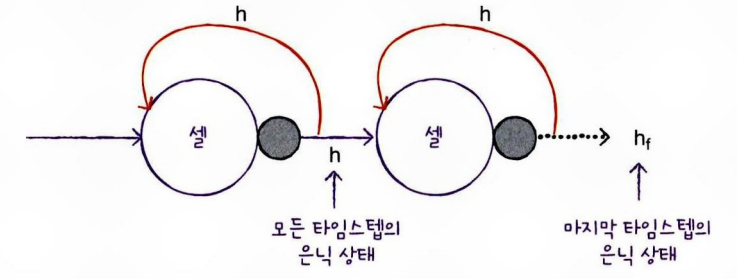

In [39]:
# 순환층
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
# 모델 구조 출력
model_2lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 모델 구조 확인
model_2lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,061 (109.62 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,708 (73.08 KB)

In [40]:
# 모델 훈련
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target), 
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.5903 - loss: 0.6530 - val_accuracy: 0.7508 - val_loss: 0.5144
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.7716 - loss: 0.4886 - val_accuracy: 0.7824 - val_loss: 0.4620
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7904 - loss: 0.4558 - val_accuracy: 0.7944 - val_loss: 0.4429
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.7910 - loss: 0.4454 - val_accuracy: 0.7854 - val_loss: 0.4522
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7994 - loss: 0.4290 - val_accuracy: 0.7744 - val_loss: 0.4645
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.8037 - loss: 0.4237 - val_accuracy: 0.8034 - val_loss: 0.4270
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8020 - loss: 0.4251 - val_accuracy: 0.8028 - val_loss: 0.4275
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.8144 - loss: 0

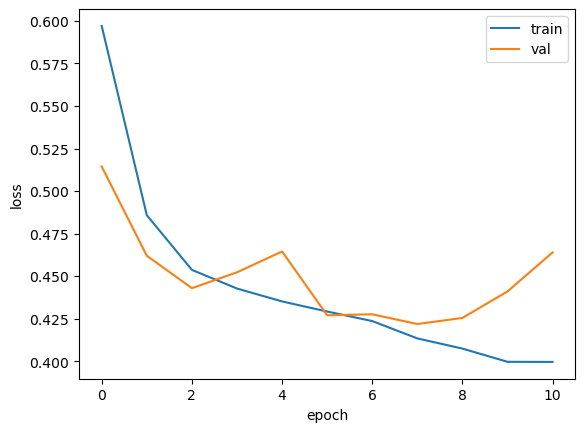

In [44]:
# 손실 그래프
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### GRU(Gated Recurrent Unit) 구조
: LSTM 간소화 버전  

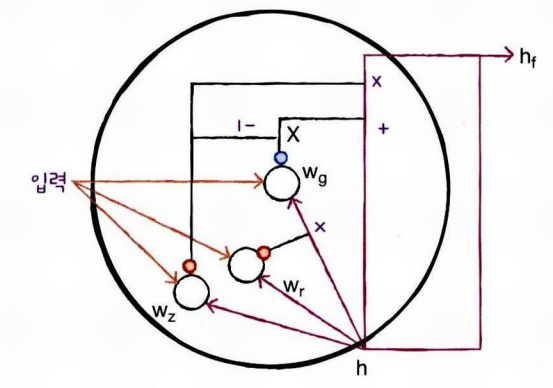

셀 3개 중 2개는 시그모이드 활성화 함수, 하나는 tanh 활성화 함수 사용  
LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 보임  

In [47]:
# GRU 신경망 훈련
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))

In [48]:
# 모델 확인
model_gru.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# GRU 셀을 사용한 순환 신경망 훈련
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64,
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.5851 - loss: 0.6656 - val_accuracy: 0.7350 - val_loss: 0.5361
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7634 - loss: 0.4966 - val_accuracy: 0.7504 - val_loss: 0.5133
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7894 - loss: 0.4586 - val_accuracy: 0.7760 - val_loss: 0.4738
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7966 - loss: 0.4454 - val_accuracy: 0.7926 - val_loss: 0.4549
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8054 - loss: 0.4286 - val_accuracy: 0.7938 - val_loss: 0.4394
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8057 - loss: 0.4273 - val_accuracy: 0.7894 - val_loss: 0.4482
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8037 - loss: 0.4273 - val_accuracy: 0.8076 - val_loss: 0.4282
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8121 - loss: 0

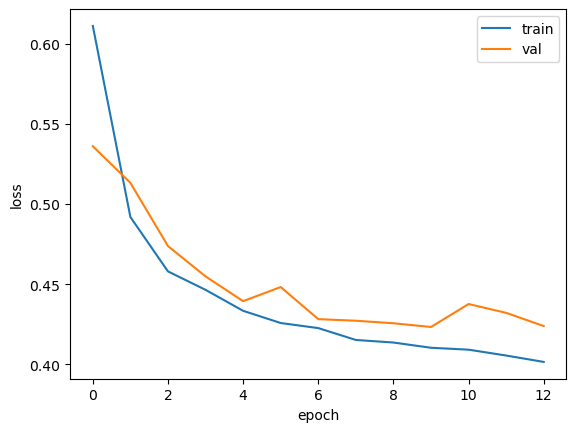

In [51]:
# 손실 그래프
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [52]:
# 테스트 세트 성능 확인
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8092 - loss: 0.4188


[0.4183623194694519, 0.8076000213623047]